# Lab 1

## 1. DS1:

### (a) Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference.

(-6.582049353976957, 2.907438222146509)
(-3.487803001902423, 8.378459486443464)


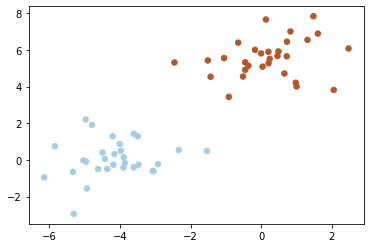

In [1]:
#### 生成随机数据，进行SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sb
import warnings
warnings.simplefilter("ignore")
dataset_number = 60


X, y = make_blobs(n_samples=dataset_number, centers=2, random_state=100000)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# 绘制decision function的结果
ax = plt.gca()
xlim = ax.get_xlim()
print(xlim)  # 输出x的范围
ylim = ax.get_ylim()
print(ylim)  # 输出y的范围

# 保存为csv
D1 = np.concatenate((X,y.reshape((dataset_number,1))),axis=1)
np.savetxt('D1.csv',D1,fmt='%.6f',delimiter=',')

### (b) Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

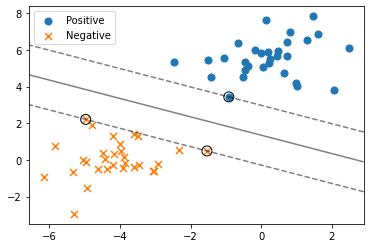

In [2]:
# 读取数据
data1 = pd.read_csv('D1.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

# 拟合模型，并且为了展示作用，并不进行标准化
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(data1.iloc[:,:-1],data1['y'])

# 创造网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)   #升维
xy = np.vstack([XX.ravel(), YY.ravel()]).T   #扁平化
# print(xy)
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制数据点
ax = plt.gca()
ax.scatter(positive['X1'], positive['X2'], s=50, marker='o', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='x', label='Negative')
ax.legend()
# 绘制决策边界和边际
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

### (c) Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.

In [3]:
from sklearn.model_selection import LeaveOneOut
train_score = []
test_score = []
loo = LeaveOneOut()
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values
for train, test in loo.split(X):
    clf = svm.SVC(kernel='linear', C=0.001)
    clf.fit(X[train], y[train])
#     print(clf.score(X[train], y[train]))
#     print(clf.score(X[test], y[test]))

    train_score.append(clf.score(X[train], y[train]))
    test_score.append(clf.score(X[test], y[test]))
# 输出得分均值
print(np.array(train_score).mean())
print(np.array(test_score).mean())
####task1 end

1.0
1.0


### (d) Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

我们将C设定从$10^{-5}$至$10^{3}$，得到的结果图像如下，发现当C小于1时，软间隔中存在点。

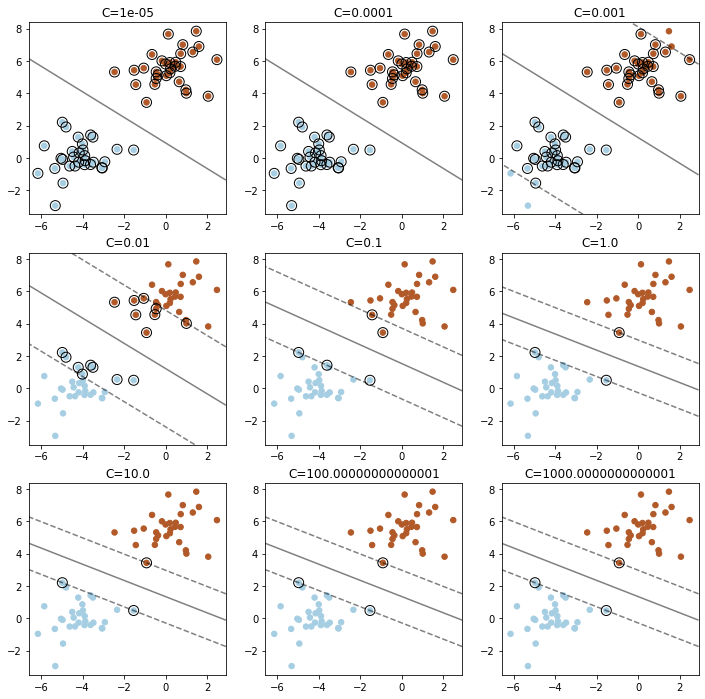

In [4]:
# 创造网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 固定图大小
plt.figure(figsize=(12,12))
# 依次绘图
for i in range(9):
    # C从0.00001至1000的变化
    C = 10**-5 * 10**i
    # 拟合模型，并且为了展示作用，并不进行标准化
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # 绘制决策边界和边际
    plt.subplot(3,3,i+1)   #绘制子图
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    ax.set_title('C='+str(C))
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # 绘制支持向量
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### (e) Explain what C does and how it improved the SVM in this case.

C的本质是正则化系数。 C值是惩罚系数或者叫惩罚因子,表征的是模型对于误差的容忍度。 C值越高,表征模型越不能接受出现误差,但是容易过拟合。 C值越小,模型对于误差比较宽容,但是模型容易欠拟合。 C值过大或者过小,都会导致模型泛化效能变差,达不到学习的效果和目的。在这个案例中，C值越小，误差越大，中间的点越多；C值越大，中间的点越少。

## 2. DS2:

### (a) Repeat step 1.b and 1.c from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this way evaluating.

我们使用线性核函数分类，发现效果并不理想；我们使用k折交叉验证方式，因为数据集过大，使用留一法将浪费大量的时间。

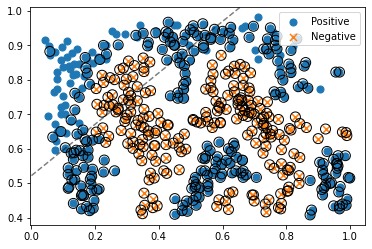

In [5]:
# 读取数据
data1 = pd.read_csv('D2.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([-1])]

# 拟合模型，并且为了展示作用，并不进行标准化
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(data1.iloc[:,:-1],data1['y'])

# 绘制数据点
plt.figure()
plt.scatter(positive['X1'], positive['X2'], s=50, marker='o', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=50, marker='x', label='Negative')
plt.legend()
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创造网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)   #升维
xy = np.vstack([XX.ravel(), YY.ravel()]).T   #扁平化
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制决策边界和边际
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [6]:
# 输出不同C下的得分均值,画图封装函数
def show_score(classifiers):
    plt.figure(figsize=(14,7))
    classifiers = np.asarray(classifiers)
    plt.subplot(1,2,1)
    plt.xscale('log')
    plt.ylim(ymin = 0, ymax = 1)
    plt.scatter(classifiers[:,0], classifiers[:,1], s=50)
    plt.plot(classifiers[:,0], classifiers[:,1])
    for i,j in zip(classifiers[:,0], classifiers[:,1]):
        plt.text(i, j, '{:.2f}'.format(j))
    plt.title('the mean of train score in different C')

    plt.subplot(1,2,2)
    plt.xscale('log')
    plt.ylim(ymin = 0, ymax = 1)
    plt.scatter(classifiers[:,0], classifiers[:,2], s=50)
    plt.plot(classifiers[:,0], classifiers[:,2])
    for i,j in zip(classifiers[:,0], classifiers[:,2]):
        plt.text(i, j, '{:.2f}'.format(j))
    plt.title('the mean of test score in different C')

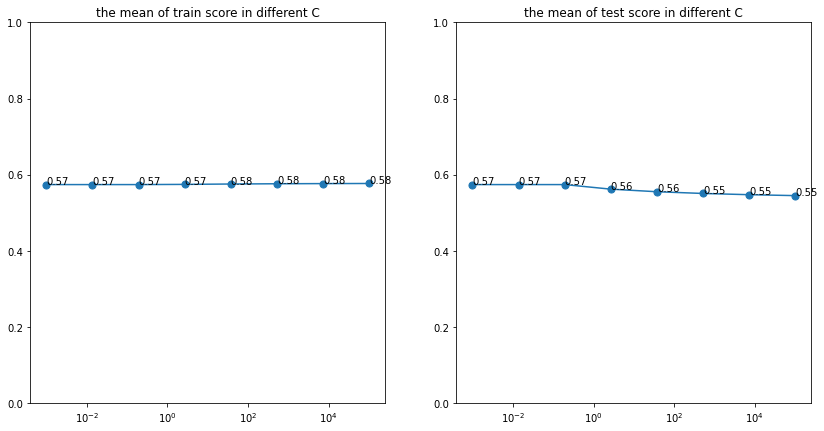

In [7]:
from sklearn.model_selection import KFold
# 读取数据
data1 = pd.read_csv('D2.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([-1])]

# C 范围
C_range = np.logspace(-3, 5, 8)
classifiers = []
# k折
train_score = []
test_score = []
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values
KF = KFold(n_splits=5)

for C in C_range:
    for train, test in KF.split(X):
        clf = svm.SVC(kernel='linear', C=C)
        clf.fit(X[train], y[train])
        train_score.append(clf.score(X[train], y[train]))
        test_score.append(clf.score(X[test], y[test]))
    train_score_mean = np.array(train_score).mean()
    test_score_mean = np.array(test_score).mean()
    classifiers.append((C,train_score_mean,test_score_mean))

# 画图
show_score(classifiers)

### (b) Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

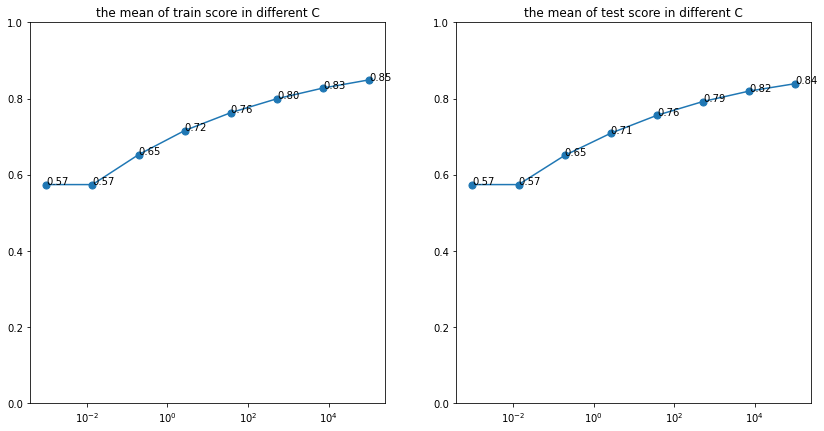

In [8]:
from sklearn.model_selection import KFold
# 读取数据
data1 = pd.read_csv('D2.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([-1])]

# C 范围
C_range = np.logspace(-3, 5, 8)
classifiers = []
# k折
train_score = []
test_score = []
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values
KF = KFold(n_splits=5)

for C in C_range:
    for train, test in KF.split(X):
        clf = svm.SVC(C=C)
        clf.fit(X[train], y[train])
        train_score.append(clf.score(X[train], y[train]))
        test_score.append(clf.score(X[test], y[test]))
    train_score_mean = np.array(train_score).mean()
    test_score_mean = np.array(test_score).mean()
    classifiers.append((C,train_score_mean,test_score_mean))
# 画图
show_score(classifiers)

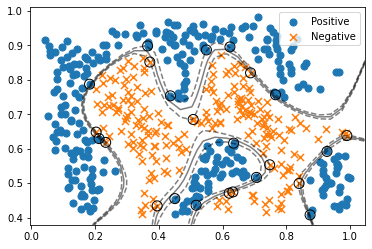

In [9]:
from sklearn.model_selection import KFold
# 读取数据
data1 = pd.read_csv('D2.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([-1])]

# 拟合模型，并且为了展示作用，并不进行标准化
clf = svm.SVC(kernel='rbf', C=1e10)
clf.fit(data1.iloc[:,:-1],data1['y'])

# 绘制数据点
plt.figure()
plt.scatter(positive['X1'], positive['X2'], s=50, marker='o', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=50, marker='x', label='Negative')
plt.legend()
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创造网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)   #升维
xy = np.vstack([XX.ravel(), YY.ravel()]).T   #扁平化
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制决策边界和边际
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

### (c) Explain which kernel you chose and why.

我们发现数据是呈非线性的，并且分类情况比较明显；所以我们最终选择了 高斯径向基（rbf）函数，其优点是可以映射到无限维，决策边界更为多样，而且只有一个参数，相比多项式核容易选择。运行后发现效果也比较令人满意。

## 3. DS3

### (a) Repeat step 1.b and 1.c from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this way evaluating.

我们使用k折交叉验证方式，因为数据集过大，使用留一法将浪费大量的时间。

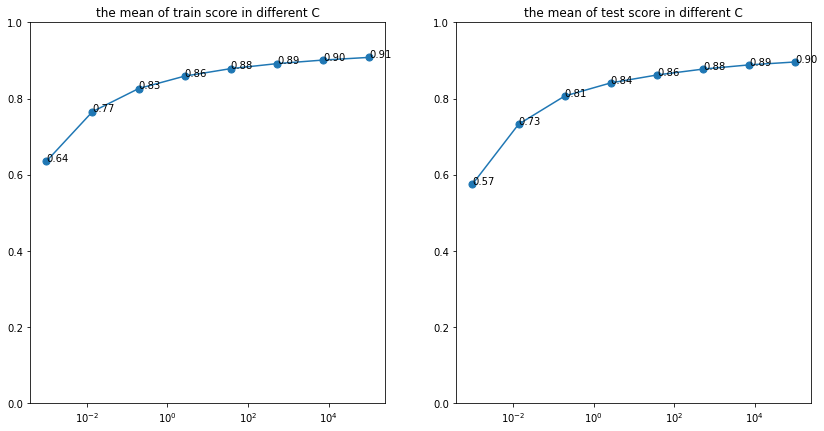

In [10]:
from sklearn.model_selection import KFold
# 读取数据
data1 = pd.read_csv('D3.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]


# C 范围
C_range = np.logspace(-3, 5, 8)
classifiers = []
# k折
train_score = []
test_score = []
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values
KF = KFold(n_splits=5)

for C in C_range:
    for train, test in KF.split(X):
        clf = svm.SVC(kernel='linear', C=C) 
        clf.fit(X[train], y[train])
        train_score.append(clf.score(X[train], y[train]))
        test_score.append(clf.score(X[test], y[test]))
    train_score_mean = np.array(train_score).mean()
    test_score_mean = np.array(test_score).mean()
    classifiers.append((C,train_score_mean,test_score_mean))
# 画图 输出得分均值
show_score(classifiers)

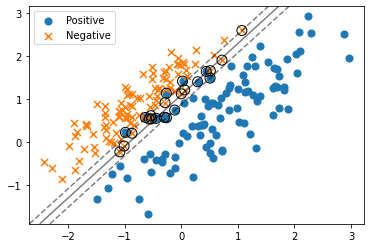

In [11]:
from sklearn.model_selection import KFold
# 读取数据
data1 = pd.read_csv('D3.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

# 拟合模型，并且为了展示作用，并不进行标准化
clf = svm.SVC(kernel='linear', C=1e4)
clf.fit(data1.iloc[:,:-1],data1['y'])

# 绘制数据点
plt.figure()
plt.scatter(positive['X1'], positive['X2'], s=50, marker='o', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=50, marker='x', label='Negative')
plt.legend()
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创造网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)   #升维
xy = np.vstack([XX.ravel(), YY.ravel()]).T   #扁平化
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制决策边界和边际
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

### (b) Pick a kernel and 2 parameters and optimize, optimize the parameters (similar to Assignment 1), plot again data set and decision boundary and give the performance.

我们依旧选择高斯径向基（rbf）函数，并增加一个gamma参数，C的作用是控制模型的复杂程度，而gamma的作用是定义了单个训练示例的影响范围；最终我们在'C'为1, 'gamma'为2.78左右得到了最高的分类得分0.96。

The best parameters are {'C': 1.0, 'gamma': 2.782559402207126} with a score of 0.96


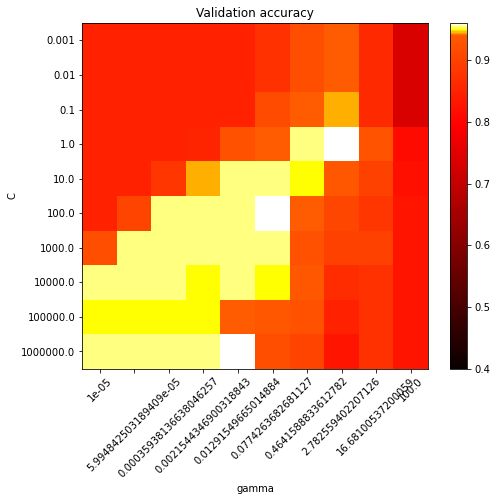

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
# 读取数据
data1 = pd.read_csv('D3.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

# C 和 gamma范围
C_range = np.logspace(-3, 6, 10)
gamma_range = np.logspace(-5, 2, 10)
classifiers1 = []
classifiers2 = []

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=1)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.4, midpoint=0.94),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

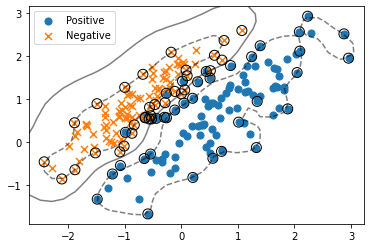

In [17]:
from sklearn.model_selection import KFold
# 读取数据
data1 = pd.read_csv('D3.csv',header = None)
data1.columns = ["X1","X2","y"]
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

# 拟合模型，并且为了展示作用，并不进行标准化
clf = svm.SVC( C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
clf.fit(data1.iloc[:,:-1],data1['y'])

# 绘制数据点
plt.figure()
plt.scatter(positive['X1'], positive['X2'], s=50, marker='o', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=50, marker='x', label='Negative')
plt.legend()
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创造网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)   #升维
xy = np.vstack([XX.ravel(), YY.ravel()]).T   #扁平化
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制决策边界和边际
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

### (c) Explain the results of the previous step.

模型的行为对gamma参数非常敏感。如果 gamma太大，则支持向量的影响区域半径仅包括支持向量本身，再大的C也无法防止过拟合。

当gamma非常小时，模型太受约束，无法捕捉数据的复杂性或“形状”。任何选定支持向量的影响区域将包括整个训练集。所得模型的行为类似于具有一组超平面的线性模型，这些超平面将任何两个类的高密度中心分开。

对于中间值，我们可以在第二个图中看到，可以在C和gamma的对角线上找到好的模型。

最后，我们还可以观察到，有时在gamma相同的情况下，当C值变得非常大时，我们会得到性能相同的模型。这表明支持向量集不再改变。RBF核的半径单独作为一个很好的结构调节器。进一步增加C无济于事，可能是因为没有更多的违反训练点（在边际内或错误分类），或者至少找不到更好的解决方案。评分相等情况下，使用较小的C值可能是有意义的，因为非常高的C值通常会增加拟合时间。

另一方面，较低的C值通常会导致更多的支持向量，这可能会增加预测时间。因此，降低C值涉及拟合时间和预测时间之间的权衡。

因此，我们在一定范围内设置C和gamma值，使用k折交叉验证去计算评分，得到的结果画在热图上（为了观看方便，将颜色显示的中值设置为0.94）最后选择了在高得分情况下，C相对较小的参数值。